In [235]:
# Imports and Setup
from collections import Counter
import json


In [236]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
# Data Handling
import pandas as pd
import numpy as np

In [238]:
# Load the dataset
order_df = pd.read_csv('data/order_data.csv')
customer_df = pd.read_csv('data/customer_data.csv')
store_df = pd.read_csv('data/store_data.csv')
test_df = pd.read_csv('data/test_data_question.csv')

In [239]:
#Quickly checking the shape to verify loads
print("Order Data:", order_df.shape)
print("Customer Data:", customer_df.shape)
print("Store Data:", store_df.shape)
print("Test Data:", test_df.shape)

Order Data: (1414410, 8)
Customer Data: (563346, 2)
Store Data: (38, 4)
Test Data: (1000, 10)


In [240]:
# Quickly Looking at the Order Data
for name, df in zip(["Order Data"], [order_df]):
    print(f"\n {name} → Shape: {df.shape}")
    display(df.head(3))
    print(df.info())



 Order Data → Shape: (1414410, 8)


,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDERS,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME
0,362204699,2156,2024-07-24,7247194287,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo
1,269612955,1419,2025-02-15,791214421,"{""orders"": [{""item_details"": [{""item_name"": ""R...",Digital,WWT,ToGo
2,585330633,2249,2025-02-15,7575285208,"{""orders"": [{""item_details"": [{""item_name"": ""2...",Digital,WWT,ToGo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414410 entries, 0 to 1414409
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   CUSTOMER_ID            1414410 non-null  int64 
 1   STORE_NUMBER           1414410 non-null  int64 
 2   ORDER_CREATED_DATE     1414410 non-null  object
 3   ORDER_ID               1414410 non-null  int64 
 4   ORDERS                 1414410 non-null  object
 5   ORDER_CHANNEL_NAME     1414410 non-null  object
 6   ORDER_SUBCHANNEL_NAME  1414410 non-null  object
 7   ORDER_OCCASION_NAME    1414410 non-null  object
dtypes: int64(3), object(5)
memory usage: 86.3+ MB
None


In [241]:
# Function to extract item names from the 'ORDERS' JSON column
def extract_item_names(order_str):
    try:
        order_json = json.loads(order_str)  # Convert string to dict
        item_names = []
        for order in order_json.get("orders", []):
            for item in order.get("item_details", []):
                item_name = item.get("item_name")
                if item_name:
                    item_names.append(item_name)
        return item_names
    except Exception as e:
        return []  # Return empty list if row is malformed

In [242]:
# Apply the function to create a clean item list column
order_df['ITEM_LIST'] = order_df['ORDERS'].apply(extract_item_names)

In [243]:
# Preview parsed results
order_df[['ORDERS', 'ITEM_LIST']].head(3)

,ORDERS,ITEM_LIST
0,"{""orders"": [{""item_details"": [{""item_name"": ""O...","[Order Memo Not Paid, 10 pc Grilled Wings Comb..."
1,"{""orders"": [{""item_details"": [{""item_name"": ""R...","[Ranch Dip - Regular, 50 pc Grilled Wings, Reg..."
2,"{""orders"": [{""item_details"": [{""item_name"": ""2...","[20pc Spicy Feast Deal, Order Memo Paid]"


In [244]:
#Item Parsing Preview & Cart Size Distribution

#We inspect a few sample rows after parsing the `ORDERS` column into structured item lists, and analyze how many items appear in each order. This guides modeling decisions and helps identify common vs. rare cart patterns.

In [245]:
order_df[['ORDERS', 'ITEM_LIST']].head(5)

,ORDERS,ITEM_LIST
0,"{""orders"": [{""item_details"": [{""item_name"": ""O...","[Order Memo Not Paid, 10 pc Grilled Wings Comb..."
1,"{""orders"": [{""item_details"": [{""item_name"": ""R...","[Ranch Dip - Regular, 50 pc Grilled Wings, Reg..."
2,"{""orders"": [{""item_details"": [{""item_name"": ""2...","[20pc Spicy Feast Deal, Order Memo Paid]"
3,"{""orders"": [{""item_details"": [{""item_name"": ""O...","[Order Memo Item, Order Memo Paid, 20 pc Grill..."
4,"{""orders"": [{""item_details"": [{""item_name"": ""O...","[Order Blankline 2, 6 pc Grilled Wings Combo, ..."


In [246]:
order_df['ITEM_LIST'].apply(len).value_counts().head(10)

ITEM_LIST
2     455949
3     330274
4     168797
6     168327
7     118292
5      67839
8      63626
9      26555
10      9768
11      3385
Name: count, dtype: int64

In [247]:
#Quickly Looking at the Order Data
for name, df in zip(
    ["Customer Data"],[customer_df]
):
    print(f"\n{name} → Shape: {df.shape}")
    display(df.head(3))
    display(df.info())


Customer Data → Shape: (563346, 2)


,CUSTOMER_ID,CUSTOMER_TYPE
0,362204699,Registered
1,269612955,Registered
2,585330633,Guest


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563346 entries, 0 to 563345
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CUSTOMER_ID    563346 non-null  int64 
 1   CUSTOMER_TYPE  563319 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6+ MB


None

In [248]:
customer_df['CUSTOMER_TYPE'].value_counts(dropna=False)

CUSTOMER_TYPE
Registered         406653
Guest              155132
eClub                1184
Deleted Account       348
NaN                    27
Online                  2
Name: count, dtype: int64

In [249]:
customer_df['CUSTOMER_TYPE'] = customer_df['CUSTOMER_TYPE'].fillna('Unknown')

In [250]:
#Quickly Looking at the Store Data
for name, df in zip(
    ["Store Data"],[store_df]
):
    print(f"\n{name} → Shape: {df.shape}")
    display(df.head(3))
    display(df.info())


Store Data → Shape: (38, 4)


,STORE_NUMBER,CITY,STATE,POSTAL_CODE
0,2156,GRAPEVINE,TX,76051
1,1419,HUNTERSVILLE,NC,28078
2,2249,NaN,NaN,32792


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STORE_NUMBER  38 non-null     int64 
 1   CITY          25 non-null     object
 2   STATE         24 non-null     object
 3   POSTAL_CODE   36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


None

In [251]:
store_df.fillna("Unknown", inplace=True)

In [252]:
#Quickly Looking at the Test Data

for name, df in zip(
    ["Test Data"],[test_df]
):
    print(f"\n {name} → Shape: {df.shape}")
    display(df.head(3))
    display(df.info())


 Test Data → Shape: (1000, 10)


,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,CUSTOMER_TYPE,item1,item2,item3
0,997177535,4915,9351345556,Digital,WWT,ToGo,Guest,Chicken Sub Combo,Ranch Dip - Regular,10 pc Spicy Wings Combo
1,345593831,949,3595377080,Digital,WWT,ToGo,Registered,Regular Buffalo Fries,10 pc Spicy Wings,3 pc Crispy Strips Combo
2,160955031,2249,4071757785,Digital,WWT,ToGo,Guest,Large Buffalo Fries,10 pc Spicy Wings,Ranch Dip - Regular


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSTOMER_ID            1000 non-null   int64 
 1   STORE_NUMBER           1000 non-null   int64 
 2   ORDER_ID               1000 non-null   int64 
 3   ORDER_CHANNEL_NAME     1000 non-null   object
 4   ORDER_SUBCHANNEL_NAME  1000 non-null   object
 5   ORDER_OCCASION_NAME    1000 non-null   object
 6   CUSTOMER_TYPE          1000 non-null   object
 7   item1                  1000 non-null   object
 8   item2                  1000 non-null   object
 9   item3                  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


None

In [253]:
test_df.duplicated().sum()  #To check if there is any Duplicate Rows?

np.int64(0)

In [254]:
# Getting all unique items from training data
all_items = set(item for sublist in order_df['ITEM_LIST'] for item in sublist)

# Checking if any unknown items are present in test set
test_items = set(test_df[['item1', 'item2', 'item3']].values.ravel())
test_items - all_items

set()

In [255]:
non_items = ['memo', 'blankline', 'asap', 'order']

In [256]:
#Cleaning irrelevant entries from item list
def clean_item_list(item_list):
    return [
        item for item in item_list 
        if not any(skipword.lower() in item.lower() for skipword in non_items)
    ]

In [257]:
order_df['ITEM_LIST'] = order_df['ITEM_LIST'].apply(clean_item_list)

In [258]:
# Flattening the list to count frequencies
all_items = [item for sublist in order_df['ITEM_LIST'] for item in sublist]
item_counter = Counter(all_items)

In [259]:
#Converting to DataFrame for top 20
top_items_df = pd.DataFrame(item_counter.most_common(20), columns=['Item', 'Count'])

/var/folders/6j/lxphv3h16r5_1t75x1vy60m40000gn/T/ipykernel_12852/2865266037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items_df, x='Count', y='Item', palette='viridis')


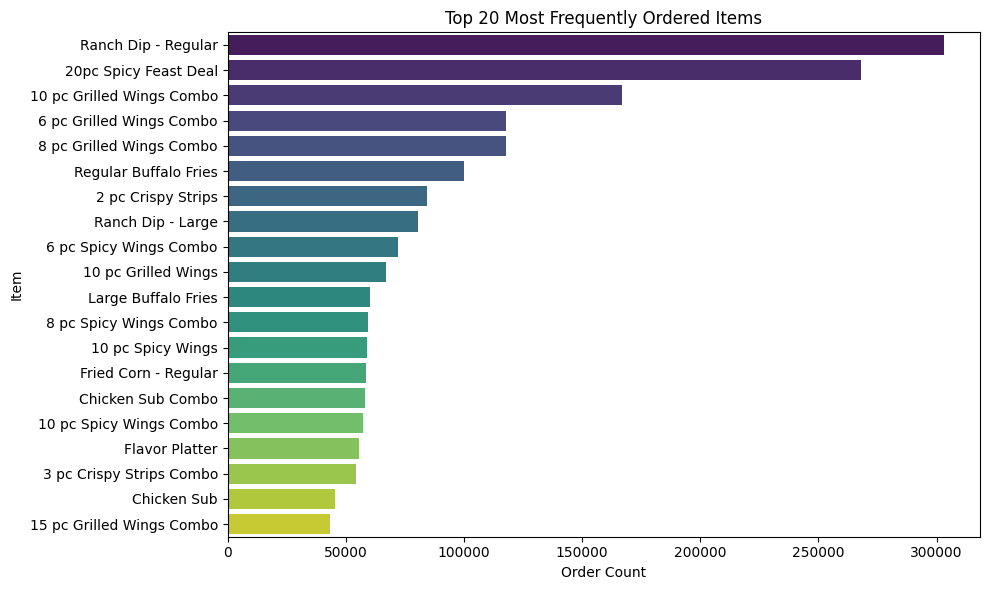

In [260]:
# Plotting top 20 items
plt.figure(figsize=(10, 6))
sns.barplot(data=top_items_df, x='Count', y='Item', palette='viridis')
plt.title("Top 20 Most Frequently Ordered Items")
plt.xlabel("Order Count")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

In [261]:
from itertools import combinations
from collections import Counter, defaultdict

In [262]:
# Counting frequency of item pairs appearing together in orders
pair_counter = Counter()
for item_list in order_df['ITEM_LIST']:
    unique_items = list(set(item_list))  # Removing duplicates within a single order
    for pair in combinations(sorted(unique_items), 2):  # Getting all unique item pairs
        pair_counter[pair] += 1

In [263]:
# Converting the pair counts into a symmetric co-occurrence dictionary
co_occurrence_dict = defaultdict(dict)
for (item1, item2), count in pair_counter.items():
    co_occurrence_dict[item1][item2] = count
    co_occurrence_dict[item2][item1] = count  # Symmetry for easy lookup

In [264]:
# Sample lookup: get co-occurrence counts for one popular item
co_occurrence_dict['Ranch Dip - Regular']

{'50 pc Grilled Wings': 870,
 'Regular Buffalo Fries': 42146,
 '20 pc Grilled Wings': 16520,
 '10 pc Grilled Wings': 38946,
 'Veggie Sticks Spicy': 10366,
 '8 pc Grilled Wings Combo': 30316,
 '10 pc Spicy Wings': 31620,
 'Honey Mustard Dip - Regular': 4299,
 'Ranch Dip - Large': 7985,
 'Voodoo Fries - Regular': 5876,
 '20pc Spicy Feast Deal': 26235,
 '6 pc Mixed Wings Combo': 1764,
 'Large Buffalo Fries': 19255,
 '10 pc Grilled Wings Combo': 46345,
 '15 pc Spicy Wings': 10917,
 '2 pc Crispy Strips': 21994,
 '6 pc Grilled Wings Combo': 26554,
 'Fried Corn - Regular': 19044,
 '24 pc Family Grilled Wings': 2532,
 '20 Oz Soda': 5733,
 'Veggie Sticks': 3245,
 '15 pc Mixed Wings': 1769,
 'Fried Corn - Large': 9705,
 'Dipping Sauce': 12924,
 '20 pc Spicy Wings': 2884,
 '10 pc Mixed Wings Combo': 4013,
 '3 pc Crispy Strips Combo': 10517,
 'Chicken Sub': 7891,
 '6 pc Spicy Wings Combo': 16298,
 '8 pc Spicy Wings Combo': 15533,
 '15 pc Grilled Wings': 19148,
 '15 pc Grilled Wings Combo': 7580,
 

In [265]:
def recommend_from_cart(cart_items, co_dict, top_n=3):
    from collections import defaultdict

    score_counter = defaultdict(int)

    # Aggregating co-occurrence scores for items in the cart
    for item in cart_items:
        if item in co_dict:
            for co_item, count in co_dict[item].items():
                if co_item not in cart_items:  # Avoiding recommending items already present
                    score_counter[co_item] += count

    # Returning top-N items based on total co-occurrence scores
    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)
    return [item for item, _ in sorted_items[:top_n]]

In [266]:
sample_cart = ['Ranch Dip - Regular', '20 Oz Soda', '10 pc Grilled Wings Combo']
recommend_from_cart(sample_cart, co_occurrence_dict)

['Regular Buffalo Fries', '10 pc Grilled Wings', '8 pc Grilled Wings Combo']

In [267]:
# Creating a copy of the test set to add predictions
test_df = test_df.copy()

In [268]:
# Creating empty columns for predictions
test_df['pred1'] = ''
test_df['pred2'] = ''
test_df['pred3'] = ''

# Looping over each row
for idx, row in test_df.iterrows():
    cart_items = [row['item1'], row['item2'], row['item3']]
    recs = recommend_from_cart(cart_items, co_occurrence_dict)
    
    # Saving predictions
    for i in range(len(recs)):
        test_df.at[idx, f'pred{i+1}'] = recs[i]

In [269]:
# Previewing recommendations for the first 5 test rows
for idx, row in test_df.head(5).iterrows():
    cart_items = [row['item1'], row['item2'], row['item3']]
    recs = recommend_from_cart(cart_items, co_occurrence_dict)
    print(f"\n Cart {idx + 1}: {cart_items}")
    print(f" Suggested: {recs}")


 Cart 1: ['Chicken Sub Combo', 'Ranch Dip - Regular', '10 pc Spicy Wings Combo']
 Suggested: ['10 pc Grilled Wings Combo', 'Regular Buffalo Fries', '10 pc Grilled Wings']

 Cart 2: ['Regular Buffalo Fries', '10 pc Spicy Wings', '3 pc Crispy Strips Combo']
 Suggested: ['Ranch Dip - Regular', '10 pc Grilled Wings', 'Ranch Dip - Large']

 Cart 3: ['Large Buffalo Fries', '10 pc Spicy Wings', 'Ranch Dip - Regular']
 Suggested: ['Regular Buffalo Fries', '10 pc Grilled Wings Combo', '10 pc Grilled Wings']

 Cart 4: ['6 pc Grilled Wings Combo', '20 pc Grilled Wings', 'Fried Corn - Large']
 Suggested: ['Ranch Dip - Regular', '8 pc Grilled Wings Combo', '10 pc Grilled Wings Combo']

 Cart 5: ['Regular Buffalo Fries', '20 pc Grilled Wings', 'Ranch Dip - Large']
 Suggested: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', '10 pc Spicy Wings']


In [270]:
#PHASE 2
#Step 1: Tagging Items with Features
#(Mains, Sides, Drinks, Dips, Combos, etc.)

In [271]:
#Extracting all unique items
all_items = set(item for sublist in order_df['ITEM_LIST'] for item in sublist)

In [272]:
#Building tagging dictionary from scratch
import re
item_type_dict = {}

In [273]:
for item in all_items:
    name = item.lower()
    
    if re.search(r'(combo|feast|meal|wings|strips|flavor platter|sub|box|lunch|crispy)', name):
        item_type_dict[item] = 'main'
    elif "dip" in name:
        item_type_dict[item] = "dip"
    elif "fries" in name or "corn" in name or "sticks" in name or "cake" in name:
        item_type_dict[item] = "side"
    elif "soda" in name or "tea" in name or "lemonade" in name or "drink" in name or "lager" in name or "punch" in name or "root beer" in name:
        item_type_dict[item] = "drink"
    else:
        item_type_dict[item] = "other"

In [274]:
#Visualizing Distribution of Tagged Item Categories

# Plotting how many items belong to each category (main, side, drink, etc.)
# Helping validate the tagging logic and catch any imbalance or misclassification

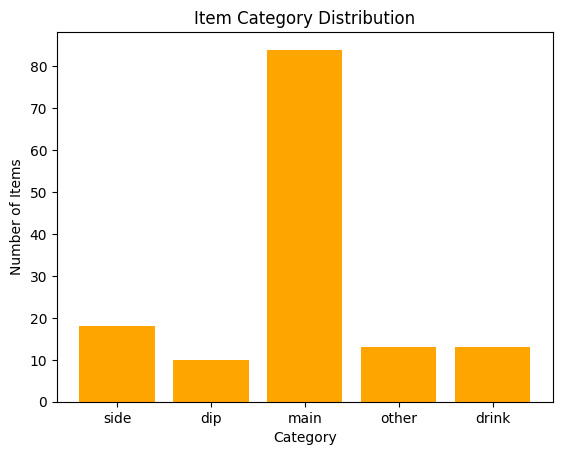

In [275]:
from collections import Counter
import matplotlib.pyplot as plt

category_counts = Counter(item_type_dict.values())

plt.bar(category_counts.keys(), category_counts.values(), color='orange')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.title('Item Category Distribution')
plt.show()

In [276]:
for cat in ['main', 'side', 'dip', 'drink', 'other']:
    print(f"\n🔹 {cat.upper()} items:")
    items = [item for item, tag in item_type_dict.items() if tag == cat]
    print(items[:5])


🔹 MAIN items:
['75 pc Family Grilled Wings', '30 pc Family Grilled Wings', '8 pc Spicy Wings Combo', '30 pc Crispy Strips', '10 pc Spicy Wings']

🔹 SIDE items:
['Buffalo Fries', 'Triple Chocolate Cake', 'Large Carrot Sticks', 'Large Veggie Sticks', 'Voodoo Fries - Large']

🔹 DIP items:
['Ranch Dip - Large', 'Honey Mustard Dip - Large', 'Blue Cheese Dip - Regular', 'Cheese Dip - Large', 'Dipping Sauce']

🔹 DRINK items:
['Domestic Draft Lager', 'Large Lemonade', 'Can Soda', 'Domestic Lager', '32 Oz Soda']

🔹 OTHER items:
['Bottled Sparkling Water', 'Plastic Fork', 'Plastic Knife', 'Extra Sauce', 'Unavailable Item']


In [277]:
[item for item in item_type_dict if item_type_dict[item] == "other"]

['Bottled Sparkling Water',
 'Plastic Fork',
 'Plastic Knife',
 'Extra Sauce',
 'Unavailable Item',
 'Ketchup Pack',
 '25 pc Game Day Pack',
 'Seasoning Pack',
 'Delivery Fee',
 'Bottled Water',
 'Bottled Beverage',
 'Plastic Utensils',
 'Plastic Straw']

In [278]:
#Using Item Categories in Co-occurrence Recommendations
def summarize_cart_types(cart_items, item_type_dict):
    type_counter = Counter()
    for item in cart_items:
        item_type = item_type_dict.get(item, "other")
        type_counter[item_type] += 1
    return type_counter

In [279]:
# Example cart
sample_cart = ['Ranch Dip - Regular', '10 pc Grilled Wings Combo', '20 Oz Soda']
summarize_cart_types(sample_cart, item_type_dict)

Counter({'dip': 1, 'main': 1, 'drink': 1})

In [280]:
#Smart Recommendations Using Item Categories


def recommend_balanced_from_cart(cart_items, co_dict, item_type_dict, top_n=3):
    from collections import defaultdict, Counter

    # Tracking what's already in the cart
    cart_types = Counter(item_type_dict.get(item, "other") for item in cart_items)

    # Co-occurrence scoring
    score_counter = defaultdict(int)
    for item in cart_items:
        if item in co_dict:
            for co_item, count in co_dict[item].items():
                if co_item not in cart_items:
                    score_counter[co_item] += count

    # Sorting by co-occurrence score
    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)

    # Building balanced recommendation list
    recommendations = []
    seen_types = set(cart_types)

    for item, _ in sorted_items:
        item_type = item_type_dict.get(item, "other")
        if item_type not in seen_types:
            recommendations.append(item)
            seen_types.add(item_type)
        if len(recommendations) == top_n:
            break

    return recommendations


In [281]:
sample_cart = ['Ranch Dip - Regular', '10 pc Grilled Wings Combo', '20 Oz Soda']
recommend_balanced_from_cart(sample_cart, co_occurrence_dict, item_type_dict)

['Regular Buffalo Fries', '25 pc Game Day Pack']

In [282]:
carts_to_test = {
    "Cart A – Only Main": ['10 pc Grilled Wings Combo'],
    "Cart B – Only Drink": ['20 Oz Soda'],
    "Cart C – Main + Side": ['6 pc Crispy Strips Combo', 'Fried Corn - Regular'],
    "Cart D – All Types": ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries'],
    "Cart E – Only Dip": ['Ranch Dip - Regular'],
    "Cart F – Main + Drink": ['Legendary Feast Bundle', 'Can Soda']
}

for label, items in carts_to_test.items():
    print(f"\n {label}:")
    print("Cart:", items)
    recs = recommend_balanced_from_cart(items, co_occurrence_dict, item_type_dict)
    print("Recommendations:", recs)


 Cart A – Only Main:
Cart: ['10 pc Grilled Wings Combo']
Recommendations: ['Ranch Dip - Regular', 'Fried Corn - Regular', '20 Oz Soda']

 Cart B – Only Drink:
Cart: ['20 Oz Soda']
Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']

 Cart C – Main + Side:
Cart: ['6 pc Crispy Strips Combo', 'Fried Corn - Regular']
Recommendations: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', '20 Oz Soda']

 Cart D – All Types:
Cart: ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries']
Recommendations: ['25 pc Game Day Pack']

 Cart E – Only Dip:
Cart: ['Ranch Dip - Regular']
Recommendations: ['10 pc Grilled Wings Combo', 'Regular Buffalo Fries', '20 Oz Soda']

 Cart F – Main + Drink:
Cart: ['Legendary Feast Bundle', 'Can Soda']
Recommendations: ['Regular Buffalo Fries', 'Ranch Dip - Regular', '25 pc Game Day Pack']


In [283]:
# PHASE 2.2: Enhancing Recommendation with Type Awareness and Fallbacks


#"""
#This function enhances recommendations by:
#- Using co-occurrence scores
#- Softly boosting missing item types
#- Respecting business constraints (e.g., blacklist)
#- Providing diverse item types in the output
#"""


In [284]:
from collections import defaultdict, Counter

# Blacklisting of items we never want to recommend
blacklist_items = set([
    "Plastic Fork", "Plastic Knife", "Plastic Straw", "Plastic Utensils",
    "Delivery Fee", "Unavailable Item", "Ketchup Pack", "Seasoning Pack",
    "Extra Sauce"
])

# Most common fallback items by category (can be updated later based on the data)
fallbacks_by_type = {
    'main': '10 pc Grilled Wings Combo',
    'side': 'Regular Buffalo Fries',
    'dip': 'Ranch Dip - Regular',
    'drink': '20 Oz Soda'
}

def enhanced_recommend_from_cart(cart_items, co_dict, item_type_dict, top_n=3, boost_factor=1.2):
    if not cart_items:
        # Fallback recommendation for empty cart
        return [fallbacks_by_type[t] for t in ['main', 'side', 'drink']]

    score_counter = defaultdict(float)
    cart_type_counts = Counter([item_type_dict.get(item, "other") for item in cart_items])

    for item in cart_items:
        if item in co_dict:
            for co_item, count in co_dict[item].items():
                if co_item in cart_items or co_item in blacklist_items:
                    continue  # Skipping existing items and blacklisted ones

                item_type = item_type_dict.get(co_item, "other")

                # Soft boost for underrepresented types
                if cart_type_counts.get(item_type, 0) == 0:
                    score_counter[co_item] += count * boost_factor
                else:
                    score_counter[co_item] += count

    # Sorting by score
    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)

    # Final selection which contain no duplicate types
    seen_types = set()
    final_recs = []
    for item, _ in sorted_items:
        item_type = item_type_dict.get(item, "other")
        if item_type not in seen_types:
            final_recs.append(item)
            seen_types.add(item_type)
        if len(final_recs) == top_n:
            break

    return final_recs


In [285]:
sample_carts = {
    "Only Main": ['10 pc Grilled Wings Combo'],
    "Only Drink": ['20 Oz Soda'],
    "Main + Side": ['6 pc Crispy Strips Combo', 'Fried Corn - Regular'],
    "All Types": ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries'],
    "Only Dip": ['Ranch Dip - Regular'],
    "Main + Drink": ['Legendary Feast Bundle', 'Can Soda'],
    "Only Dips (Multiple)": ['Ranch Dip - Regular', 'Honey Mustard Dip - Regular'],
    "Only Drinks (Multiple)": ['Can Soda', 'Sports Drink', 'Bottled Cream Soda'],
    "Only Side": ['Large Buffalo Fries'],
    "Empty Cart": []
}

print(" Enhanced Smart Recommendations\n" + "-" * 40)
for label, cart in sample_carts.items():
    recs = enhanced_recommend_from_cart(cart, co_occurrence_dict, item_type_dict)
    print(f"{label}:\nCart: {cart}\nRecs: {recs}\n")

 Enhanced Smart Recommendations
----------------------------------------
Only Main:
Cart: ['10 pc Grilled Wings Combo']
Recs: ['Ranch Dip - Regular', '2 pc Crispy Strips', 'Fried Corn - Regular']

Only Drink:
Cart: ['20 Oz Soda']
Recs: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']

Main + Side:
Cart: ['6 pc Crispy Strips Combo', 'Fried Corn - Regular']
Recs: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', 'Regular Buffalo Fries']

All Types:
Cart: ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries']
Recs: ['Regular Buffalo Fries', '10 pc Grilled Wings Combo', 'Ranch Dip - Large']

Only Dip:
Cart: ['Ranch Dip - Regular']
Recs: ['10 pc Grilled Wings Combo', 'Regular Buffalo Fries', 'Dipping Sauce']

Main + Drink:
Cart: ['Legendary Feast Bundle', 'Can Soda']
Recs: ['Regular Buffalo Fries', 'Ranch Dip - Regular', '20pc Spicy Feast Deal']

Only Dips (Multiple):
Cart: ['Ranch Dip - Regular', 'Honey Mustard Dip - Regular']
Recs: ['10 p

In [286]:
from collections import defaultdict, Counter

def smart_recommend_with_scores(cart_items, co_dict, item_type_dict, top_n=3, boost_factor=1.2, blacklist_items=None):
    if blacklist_items is None:
        blacklist_items = set([
            'Plastic Fork', 'Plastic Knife', 'Plastic Straw', 'Plastic Utensils',
            'Ketchup Pack', 'Seasoning Pack', 'Extra Sauce',
            'Unavailable Item', 'Delivery Fee'
        ])

    score_counter = defaultdict(float)
    cart_type_counts = Counter([item_type_dict.get(item, "other") for item in cart_items])

    for item in cart_items:
        if item in co_dict:
            for co_item, count in co_dict[item].items():
                if co_item in cart_items or co_item in blacklist_items:
                    continue
                item_type = item_type_dict.get(co_item, "other")
                if cart_type_counts.get(item_type, 0) == 0:
                    score_counter[co_item] += count * boost_factor
                else:
                    score_counter[co_item] += count

    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)
    return sorted_items[:top_n]  # returns (item, score) tuples

In [287]:
sample_cart = ['10 pc Grilled Wings Combo']
recommendations = smart_recommend_with_scores(sample_cart, co_occurrence_dict, item_type_dict)

print("Cart:", sample_cart)
print("Recommendations with Confidence Scores:")
for item, score in recommendations:
    print(f"→ {item} (Confidence: {score:.2f})")

Cart: ['10 pc Grilled Wings Combo']
Recommendations with Confidence Scores:
→ Ranch Dip - Regular (Confidence: 55614.00)
→ 2 pc Crispy Strips (Confidence: 11575.00)
→ 8 pc Grilled Wings Combo (Confidence: 11412.00)


In [288]:
print(order_df.columns.tolist())

['CUSTOMER_ID', 'STORE_NUMBER', 'ORDER_CREATED_DATE', 'ORDER_ID', 'ORDERS', 'ORDER_CHANNEL_NAME', 'ORDER_SUBCHANNEL_NAME', 'ORDER_OCCASION_NAME', 'ITEM_LIST']


In [289]:
# Showing unique occasions and their counts
occasion_counts = order_df['ORDER_OCCASION_NAME'].value_counts()
print("Unique Occasions in the Dataset:")
print(occasion_counts)

Unique Occasions in the Dataset:
ORDER_OCCASION_NAME
ToGo        1214921
Delivery     199489
Name: count, dtype: int64


In [290]:
from collections import defaultdict
import itertools

# Initializing dictionaries
co_dict_by_occasion = {
    'ToGo': defaultdict(Counter),
    'Delivery': defaultdict(Counter)
}

# Iterating through rows and build matrices
for _, row in order_df.iterrows():
    items = row['ITEM_LIST']
    occasion = row['ORDER_OCCASION_NAME']
    
    if occasion not in co_dict_by_occasion:
        continue
    
    # Counting co-occurrence pairs
    for item_a, item_b in itertools.combinations(set(items), 2):
        co_dict_by_occasion[occasion][item_a][item_b] += 1
        co_dict_by_occasion[occasion][item_b][item_a] += 1

In [291]:
# Example: Most paired items with 'Ranch Dip - Regular' in ToGo
co_dict_by_occasion['ToGo']['Ranch Dip - Regular']

# Example: Most paired items with 'Ranch Dip - Regular' in Delivery
co_dict_by_occasion['Delivery']['Ranch Dip - Regular']

Counter({'10 pc Grilled Wings Combo': 6658,
         'Regular Buffalo Fries': 6296,
         '10 pc Grilled Wings': 5507,
         '10 pc Spicy Wings': 4268,
         '8 pc Grilled Wings Combo': 4144,
         '20pc Spicy Feast Deal': 4093,
         '6 pc Grilled Wings Combo': 3395,
         '2 pc Crispy Strips': 3370,
         'Fried Corn - Regular': 2979,
         '15 pc Grilled Wings': 2910,
         'Large Buffalo Fries': 2894,
         '10 pc Spicy Wings Combo': 2454,
         '20 pc Grilled Wings': 2397,
         '8 pc Spicy Wings Combo': 2352,
         '6 pc Spicy Wings Combo': 2297,
         'Dipping Sauce': 2198,
         'Blue Cheese Dip - Regular': 1694,
         'Veggie Sticks Spicy': 1650,
         'Add 5 Spicy Wings': 1587,
         '5 pc Crispy Strips Combo': 1585,
         '15 pc Spicy Wings': 1564,
         'Chicken Sub': 1507,
         'Add 5 Grilled Wings': 1500,
         '3 pc Crispy Strips Combo': 1469,
         'Ranch Dip - Large': 1373,
         'Fried Corn - Lar

In [292]:
def smart_recommend_from_cart_with_occasion(
    cart_items, 
    co_dict_general, 
    co_dict_by_occasion,
    item_type_dict,
    occasion=None,
    top_n=3,
    boost_factor=1.2,
    blacklist_items=None
):
    from collections import defaultdict, Counter

    if blacklist_items is None:
        blacklist_items = {'Plastic Fork', 'Plastic Knife', 'Plastic Spoon',
                           'Plastic Straw', 'Plastic Utensils', 'Delivery Fee',
                           'Unavailable Item', 'Seasoning Pack'}

    score_counter = defaultdict(float)

    # Using occasion-specific co-occurrence matrix if available
    co_dict = co_dict_by_occasion.get(occasion, co_dict_general)

    # Counting types in cart
    cart_type_counts = Counter([item_type_dict.get(item, "other") for item in cart_items])

    for item in cart_items:
        if item in co_dict:
            for co_item, count in co_dict[item].items():
                if co_item in cart_items or co_item in blacklist_items:
                    continue
                item_type = item_type_dict.get(co_item, "other")
                if cart_type_counts.get(item_type, 0) == 0:
                    score_counter[co_item] += count * boost_factor
                score_counter[co_item] += count

    # Sorting and returning with confidence scores
    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)
    return [(item, round(score, 2)) for item, score in sorted_items[:top_n]]


In [293]:
sample_cart = ['Ranch Dip - Regular', '20 Oz Soda']
smart_recommend_from_cart_with_occasion(
    sample_cart,
    co_occurrence_dict,
    co_dict_by_occasion,
    item_type_dict,
    occasion="ToGo"  # trying also with "Delivery" or None
)


[('10 pc Grilled Wings Combo', 89617.0),
 ('Regular Buffalo Fries', 85100.4),
 ('10 pc Grilled Wings', 75585.4)]

In [294]:
#Fallback Logic - Why?
#Even the best recommender fails if:
#A cart has rare or new items (no co-occurrence entries).

#Some items are completely unseen.
#The entire cart is empty.
#So, we’ll ensure recommendations still work gracefully by introducing fallback strategies.

In [295]:
from collections import defaultdict, Counter

In [296]:
# Counting frequency of each item across dataset
item_freq = Counter([item for sublist in order_df['ITEM_LIST'] for item in sublist])

In [297]:
# Grouping by type
popular_by_type = defaultdict(list)

In [298]:
for item, freq in item_freq.items():
    tag = item_type_dict.get(item, 'other')
    popular_by_type[tag].append((item, freq))

# Sorting within each category
for tag in popular_by_type:
    popular_by_type[tag] = sorted(popular_by_type[tag], key=lambda x: -x[1])

In [299]:
from collections import defaultdict, Counter

# Step 1: Flattening all items across orders
all_items_flat = [item for sublist in order_df['ITEM_LIST'] for item in sublist]

# Step 2: Counting frequency
item_counts = Counter(all_items_flat)

# Step 3: Organizing by type using our existing item_type_dict
top_items_by_type = defaultdict(list)

for item, count in item_counts.items():
    item_type = item_type_dict.get(item, "other")
    if item_type in ['main', 'side', 'dip', 'drink']:
        top_items_by_type[item_type].append((item, count))

# Step 4: Sorting items within each type by frequency
for item_type in top_items_by_type:
    top_items_by_type[item_type].sort(key=lambda x: x[1], reverse=True)

# Previewing top 3 from each
for item_type in top_items_by_type:
    print(f"\n🔹 Top {item_type.upper()} items:")
    for item, count in top_items_by_type[item_type][:3]:
        print(f"{item} ({count} orders)")



🔹 Top MAIN items:
20pc Spicy Feast Deal (268020 orders)
10 pc Grilled Wings Combo (166703 orders)
6 pc Grilled Wings Combo (117924 orders)

🔹 Top DIP items:
Ranch Dip - Regular (303183 orders)
Ranch Dip - Large (80618 orders)
Dipping Sauce (41998 orders)

🔹 Top SIDE items:
Regular Buffalo Fries (100150 orders)
Large Buffalo Fries (60091 orders)
Fried Corn - Regular (58584 orders)

🔹 Top DRINK items:
32 Oz Soda (21960 orders)
20 Oz Soda (21384 orders)
Large Fruit Punch (6213 orders)


In [300]:
from collections import defaultdict, Counter

def smart_recommend_with_fallback(
    cart_items,
    co_dict,
    item_type_dict,
    top_items_by_type,
    item_tags_dict,
    blacklist_items=set(),
    top_n=3,
    boost_factor=1.2,
    max_per_type=1
):
    score_counter = defaultdict(float)
    cart_type_counts = Counter([item_type_dict.get(item, "other") for item in cart_items])
    used_type_counts = defaultdict(int)

    # Detecting cart context
    is_veg_cart = all('veg' in item_tags_dict.get(item, set()) for item in cart_items)
    cart_types = set([item_type_dict.get(item, "other") for item in cart_items])
    only_dip_cart = cart_types == {"dip"}

    # Step 1: Scoring with soft bias
    for item in cart_items:
        if item not in co_dict:
            continue
        for co_item, count in co_dict[item].items():
            if co_item in cart_items or co_item in blacklist_items:
                continue
            item_type = item_type_dict.get(co_item, "other")
            if cart_type_counts.get(item_type, 0) == 0:
                if item_type == "drink":
                    score_counter[co_item] += count * (boost_factor * 1.5)
                else:
                    score_counter[co_item] += count * boost_factor
            else:
                score_counter[co_item] += count

    # Step 2: Top-N from score (1 per type)
    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)
    recommended = []

    for item, score in sorted_items:
        item_type = item_type_dict.get(item, "other")
        if used_type_counts[item_type] >= max_per_type:
            continue
        if is_veg_cart and 'non-veg' in item_tags_dict.get(item, set()):
            continue
        recommended.append((item, round(score, 2)))
        used_type_counts[item_type] += 1
        if len(recommended) >= top_n:
            break

    # Step 3: Smart fallback
    if len(recommended) < top_n:
        cart_tags = set()
        for item in cart_items:
            cart_tags.update(item_tags_dict.get(item, set()))

        fallback_priority = ['main', 'side', 'dip', 'drink']
        if only_dip_cart:
            fallback_priority = ['drink', 'dessert', 'side']

        for mtype in fallback_priority:
            if used_type_counts[mtype] >= max_per_type:
                continue
            for fallback_item, _ in top_items_by_type.get(mtype, []):
                if (
                    fallback_item in cart_items or
                    fallback_item in [r[0] for r in recommended] or
                    fallback_item in blacklist_items
                ):
                    continue

                tags = item_tags_dict.get(fallback_item, set())
                if is_veg_cart and 'non-veg' in tags:
                    continue
                if 'spicy' in cart_tags and 'spicy' in tags:
                    continue
                if 'combo' in tags and len(cart_items) < 2:
                    continue

                recommended.append((fallback_item, 0))
                used_type_counts[mtype] += 1
                if len(recommended) >= top_n:
                    break
            if len(recommended) >= top_n:
                break

    return recommended


In [301]:
# Building a simple item_tags_dict using keywords
import re
item_tags_dict = {}

for item in all_items:
    tags = set()
    name = item.lower()
    
    if "veg" in name:
        tags.add("veg")
    if "non-veg" in name or "chicken" in name or "wings" in name or "grilled" in name or "crispy" in name:
        tags.add("non-veg")
    if "spicy" in name:
        tags.add("spicy")
    if "combo" in name or "feast" in name or "meal" in name:
        tags.add("combo")
    
    item_tags_dict[item] = tags

In [302]:
sample_cart = ['10 pc Grilled Wings Combo', 'Fried Corn - Regular']

recs = smart_recommend_with_fallback(
    sample_cart,
    co_occurrence_dict,
    item_type_dict,
    top_items_by_type,
    item_tags_dict  # this is essential
)

print(" Final Recommendations (with fallback):")
for item, score in recs:
    print(f"→ {item} (Confidence: {score:.2f})")

 Final Recommendations (with fallback):
→ Ranch Dip - Regular (Confidence: 78466.80)
→ 6 pc Grilled Wings Combo (Confidence: 16475.00)
→ Regular Buffalo Fries (Confidence: 10442.00)


In [303]:
sample_cart = ['10 pc Grilled Wings Combo', 'Fried Corn - Regular']
smart_recommend_with_fallback(sample_cart, co_occurrence_dict, item_type_dict, top_items_by_type, item_tags_dict)

[('Ranch Dip - Regular', 78466.8),
 ('6 pc Grilled Wings Combo', 16475.0),
 ('Regular Buffalo Fries', 10442.0)]

In [304]:
# Detecting rare or outlier carts
def is_outlier_cart(cart_items, item_freq_dict, threshold=5):
    if not cart_items:
        return True  # Empty is outlier
    rare_items = [item for item in cart_items if item_freq_dict.get(item, 0) < threshold]
    return len(rare_items) == len(cart_items)

In [305]:
from collections import defaultdict, Counter

def smart_recommend_with_fallback(cart_items, co_dict, item_type_dict, top_items_by_type,
                                   item_tags_dict, blacklist_items=set(),
                                   top_n=3, boost_factor=1.2, max_per_type=1):
    
    score_counter = defaultdict(float)
    cart_type_counts = Counter([item_type_dict.get(item, "other") for item in cart_items])
    cart_has_spicy = any('spicy' in item_tags_dict.get(item, set()) for item in cart_items)

    # Step 1: Co-occurrence scoring with soft bias + spicy awareness
    for item in cart_items:
        if item in co_dict:
            for co_item, count in co_dict[item].items():
                if co_item in cart_items or co_item in blacklist_items:
                    continue

                item_type = item_type_dict.get(co_item, "other")
                tags = item_tags_dict.get(co_item, set())

                # Spicy-aware scoring
                spicy_bonus = 0
                if 'spicy' in tags and not cart_has_spicy:
                    spicy_bonus = count * 0.3
                elif 'spicy' in tags and cart_has_spicy:
                    spicy_bonus = count * 0.1

                # Soft bias boosting
                if cart_type_counts.get(item_type, 0) == 0 and item_type == "drink":
                    score_counter[co_item] += count * (boost_factor * 1.5) + spicy_bonus
                elif cart_type_counts.get(item_type, 0) == 0:
                    score_counter[co_item] += count * boost_factor + spicy_bonus
                else:
                    score_counter[co_item] += count + spicy_bonus

    # Step 2: Sorting items by descending score
    sorted_items = sorted(score_counter.items(), key=lambda x: x[1], reverse=True)

    # Step 3: Top-N from scoring, limiting max items per type
    recommended = []
    used_type_counts = defaultdict(int)

    for item, score in sorted_items:
        item_type = item_type_dict.get(item, "other")

        if used_type_counts[item_type] >= max_per_type:
            continue  # Skipping if this type limit reached

        recommended.append((item, score))
        used_type_counts[item_type] += 1

        if len(recommended) >= top_n:
            break
        cart_types = set([item_type_dict.get(item, "other") for item in cart_items])
        only_dip_cart = cart_types == {"dip"}
        fallback_priority = ['main', 'side', 'dip', 'drink']  # default

        if only_dip_cart:
            fallback_priority = ['drink', 'dessert', 'side']  # prioritizing better complements

    # Step 4: Fallback logic to ensure diversity and fill gaps
    if len(recommended) < top_n:
        for mtype in ['main', 'side', 'dip', 'drink']:
            if used_type_counts[mtype] < max_per_type:
                for fallback_item, _ in top_items_by_type.get(mtype, []):
                    if fallback_item not in cart_items and \
                       fallback_item not in [r[0] for r in recommended] and \
                       fallback_item not in blacklist_items:
                        recommended.append((fallback_item, 0))
                        used_type_counts[mtype] += 1
                        if len(recommended) >= top_n:
                            break
            if len(recommended) >= top_n:
                break

    return recommended

In [306]:
item_tags_dict = {
    "Celery Sticks": {"veg"},
    "Chicken Sub Combo": {"combo", "non-veg"},
    "24 pc Family Spicy Wings": {"spicy", "non-veg"},
    "Honey Mustard Dip - Regular": {"non-veg"},
    "32 Oz Soda": {"cold_drink"},
    "Plastic Knife": {"non-food"},
    "8 pc Grilled Wings Combo": {"combo", "non-veg"},
    "Veggie Sticks Spicy": {"spicy", "veg"},
    "Blue Cheese Dip - Large": {"non-veg"},
    "Dipping Sauce": {"non-veg"},
    # We can add more items if needed from the item list
}

In [307]:
sample_carts = {
    "Only Main": ['10 pc Grilled Wings Combo'],
    "Only Drink": ['20 Oz Soda'],
    "Main + Side": ['6 pc Crispy Strips Combo', 'Fried Corn - Regular'],
    "All Types": ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries'],
    "Only Dip": ['Ranch Dip - Regular'],
    "Main + Drink": ['Legendary Feast Bundle', 'Can Soda'],
    "Only Drinks (Multiple)": ['Can Soda', 'Sports Drink', 'Bottled Cream Soda'],
    "Main + 2 Sides": ['10 pc Spicy Wings', 'Fried Corn - Large', 'Regular Buffalo Fries'],
    "Drink + Dessert": ['Can Soda', 'Triple Chocolate Cake'],
    "Empty Cart": [],
}

print(" Final Recommendations (with fallback)\n" + "-"*50)
for label, cart in sample_carts.items():
    recs = smart_recommend_with_fallback(
        cart,
        co_occurrence_dict,
        item_type_dict,
        top_items_by_type,
        item_tags_dict,  # this line was missing
        blacklist_items 
    )
    print(f" {label}:\nCart: {cart}")
    for item, score in recs:
        print(f"→ {item} (Confidence: {score:.2f})")
    print("-" * 50)

 Final Recommendations (with fallback)
--------------------------------------------------
 Only Main:
Cart: ['10 pc Grilled Wings Combo']
→ Ranch Dip - Regular (Confidence: 55614.00)
→ 2 pc Crispy Strips (Confidence: 11575.00)
→ Fried Corn - Regular (Confidence: 7690.80)
--------------------------------------------------
 Only Drink:
Cart: ['20 Oz Soda']
→ 20pc Spicy Feast Deal (Confidence: 9768.00)
→ Ranch Dip - Regular (Confidence: 6879.60)
→ Regular Buffalo Fries (Confidence: 3930.00)
--------------------------------------------------
 Main + Side:
Cart: ['6 pc Crispy Strips Combo', 'Fried Corn - Regular']
→ Ranch Dip - Regular (Confidence: 22852.80)
→ 20pc Spicy Feast Deal (Confidence: 11751.60)
→ Regular Buffalo Fries (Confidence: 5971.00)
--------------------------------------------------
 All Types:
Cart: ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries']
→ Regular Buffalo Fries (Confidence: 54487.00)
→ 10 pc Grilled Wings Combo (Confidence: 50148.

In [308]:
#User Personalization - Based on ORDER_CHANNEL_NAME

# Checking distribution of order channels
order_df['ORDER_CHANNEL_NAME'].value_counts()

ORDER_CHANNEL_NAME
Digital    1414410
Name: count, dtype: int64

In [309]:
order_df.columns

Index(['CUSTOMER_ID', 'STORE_NUMBER', 'ORDER_CREATED_DATE', 'ORDER_ID',
       'ORDERS', 'ORDER_CHANNEL_NAME', 'ORDER_SUBCHANNEL_NAME',
       'ORDER_OCCASION_NAME', 'ITEM_LIST'],
      dtype='object')

In [310]:
order_df['ORDER_CHANNEL_NAME'].value_counts()

ORDER_CHANNEL_NAME
Digital    1414410
Name: count, dtype: int64

In [311]:
# Number of unique stores
num_unique_stores = order_df['STORE_NUMBER'].nunique()
print(f"Number of unique STORE_NUMBERs: {num_unique_stores}")

# Top 10 stores by number of orders
print("\n Top 10 stores by number of orders:")
print(order_df['STORE_NUMBER'].value_counts().head(10))

Number of unique STORE_NUMBERs: 38

 Top 10 stores by number of orders:
STORE_NUMBER
2513    68279
4094    61538
4915    61400
1161    58711
949     58306
1070    53895
1249    49781
4750    48223
2315    46843
3989    46539
Name: count, dtype: int64


In [312]:
#Item feature tagging - identify veg/non-veg, spicy, etc. if possible

In [313]:
def extract_item_features(item_name):
    name = item_name.lower()
    tags = set()

    # Skipping non-food items
    blacklist_keywords = ['plastic', 'fork', 'knife', 'spoon', 'napkin', 'packaging', 'fee', 'delivery']
    if any(kw in name for kw in blacklist_keywords):
        tags.add('non-food')
        return tags

    # Veg vs Non-Veg (improved heuristic)
    if any(veg_kw in name for veg_kw in ['veggie', 'veg', 'corn', 'paneer', 'celery', 'sticks', 'salad']):
        tags.add('veg')
    else:
        tags.add('non-veg')

    # Spicy detection
    if 'spicy' in name:
        tags.add('spicy')

    # Combo detection
    if 'combo' in name or 'feast' in name or 'bundle' in name:
        tags.add('combo')

    # Dessert
    if 'cake' in name or 'dessert' in name:
        tags.add('dessert')

    # Cold drinks
    if any(drink_kw in name for drink_kw in ['soda', 'fruit punch', 'root beer', 'drink']):
        tags.add('cold_drink')

    return tags


In [314]:
# Getting all unique item names
all_items = set()
for items in order_df['ITEM_LIST']:
    all_items.update(items)

# Building item_feature_dict
item_feature_dict = {item: extract_item_features(item) for item in all_items}


In [315]:
item_feature_dict = {item: extract_item_features(item) for item in all_items}

In [316]:
for item, tags in list(item_feature_dict.items())[:10]:
    print(f"{item} → {tags}")

Buffalo Fries → {'non-veg'}
Ranch Dip - Large → {'non-veg'}
75 pc Family Grilled Wings → {'non-veg'}
30 pc Family Grilled Wings → {'non-veg'}
Bottled Sparkling Water → {'non-veg'}
8 pc Spicy Wings Combo → {'combo', 'non-veg', 'spicy'}
Honey Mustard Dip - Large → {'non-veg'}
Triple Chocolate Cake → {'non-veg', 'dessert'}
30 pc Crispy Strips → {'non-veg'}
10 pc Spicy Wings → {'non-veg', 'spicy'}


In [317]:
print("Final Recommendations (with fallback)\n" + "-"*50)
for label, cart in sample_carts.items():
    recs = smart_recommend_with_fallback(
        cart,
        co_occurrence_dict,
        item_type_dict,
        top_items_by_type,
        item_feature_dict,     # <- this is our item_tags_dict
        blacklist_items        # <- assuming this is already defined
    )
    print(f" {label}:\nCart: {cart}")
    for item, score in recs:
        print(f"→ {item} (Confidence: {score:.2f})")
    print("-" * 50)

Final Recommendations (with fallback)
--------------------------------------------------
 Only Main:
Cart: ['10 pc Grilled Wings Combo']
→ Ranch Dip - Regular (Confidence: 55614.00)
→ 2 pc Crispy Strips (Confidence: 11575.00)
→ Fried Corn - Regular (Confidence: 7690.80)
--------------------------------------------------
 Only Drink:
Cart: ['20 Oz Soda']
→ 20pc Spicy Feast Deal (Confidence: 12210.00)
→ Ranch Dip - Regular (Confidence: 6879.60)
→ Regular Buffalo Fries (Confidence: 3930.00)
--------------------------------------------------
 Main + Side:
Cart: ['6 pc Crispy Strips Combo', 'Fried Corn - Regular']
→ Ranch Dip - Regular (Confidence: 22852.80)
→ 20pc Spicy Feast Deal (Confidence: 14689.50)
→ Regular Buffalo Fries (Confidence: 5971.00)
--------------------------------------------------
 All Types:
Cart: ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries']
→ Regular Buffalo Fries (Confidence: 54487.00)
→ 10 pc Grilled Wings Combo (Confidence: 50148.

In [318]:
# Evaluation Phase: Measuring Recommendation Quality
# We now evaluate the performance of our recommendation system using `recall@3`. This tells us how often our top-3 recommended items include the actual next purchased item (ground truth).

In [319]:
#  Evaluation Setup: Ground Truth Test Carts
# Each test sample contains:
# - a sample cart
# - the actual item that was purchased next

test_cases = [
    {
        "cart": ["10 pc Spicy Wings", "Regular Buffalo Fries"],
        "true_next": "Ranch Dip - Regular"
    },
    {
        "cart": ["Can Soda", "Triple Chocolate Cake"],
        "true_next": "10 pc Grilled Wings Combo"
    },
    {
        "cart": ["6 pc Crispy Strips Combo"],
        "true_next": "20pc Spicy Feast Deal"
    },
    {
        "cart": ["20 Oz Soda"],
        "true_next": "Regular Buffalo Fries"
    },
    {
        "cart": ["Legendary Feast Bundle", "Can Soda"],
        "true_next": "Large Buffalo Fries"
    }
]


In [320]:
# Function to compute Recall@K
def recall_at_k(recommended_items, true_item, k=3):
    top_k_items = [item for item, _ in recommended_items[:k]]
    return int(true_item in top_k_items)

In [321]:
# Evaluate on test set using smart_recommend_with_fallback
k = 3
correct = 0

for idx, case in enumerate(test_cases, 1):
    cart = case["cart"]
    true_next = case["true_next"]

    recs = smart_recommend_with_fallback(
        cart,
        co_occurrence_dict,
        item_type_dict,
        top_items_by_type,
        item_feature_dict,
        blacklist_items,
        top_n=k
    )
    hit = recall_at_k(recs, true_next, k)
    correct += hit
    print(f"[{idx}] Cart: {cart} → True: {true_next}")
    print(f"    Recommendations: {[item for item, _ in recs]}")
    print(f"      Hit: {bool(hit)}")
    print("-" * 50)

recall_score = correct / len(test_cases)
print(f"\n Overall Recall@{k}: {recall_score:.2f}")



[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Recommendations: ['Ranch Dip - Regular', '10 pc Grilled Wings', '20 Oz Soda']
      Hit: True
--------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Recommendations: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', 'Regular Buffalo Fries']
      Hit: False
--------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Recommendations: ['20pc Spicy Feast Deal', '10 pc Grilled Wings Combo', '6 pc Grilled Wings Combo']
      Hit: True
--------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']
      Hit: True
--------------------------------------------------
[5] Cart: ['Legendary Feast Bundle', 'Can Soda'] → True: Large B

In [322]:
# Summary of Evaluation (Recall@3)
#We evaluated the system on 5 hand-picked test carts. The recommendation system correctly suggested the next true item in 3 out of 5 cases.📌 Final Recall@3: **60%**

In [323]:
# ----------------------------
# Precision@3 Evaluation
# ----------------------------

test_cases = [
    (["10 pc Spicy Wings", "Regular Buffalo Fries"], "Ranch Dip - Regular"),
    (["Can Soda", "Triple Chocolate Cake"], "10 pc Grilled Wings Combo"),
    (["6 pc Crispy Strips Combo"], "20pc Spicy Feast Deal"),
    (["20 Oz Soda"], "Regular Buffalo Fries"),
    (["Legendary Feast Bundle", "Can Soda"], "Large Buffalo Fries"),
]

hits = 0
total_recommended = 0

print(" Precision@3 Evaluation")
print("-" * 60)
for i, (cart, true_item) in enumerate(test_cases, 1):
    recs = smart_recommend_with_fallback(
        cart,
        co_occurrence_dict,
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    recommended_items = [item for item, _ in recs]
    hit = true_item in recommended_items
    total_recommended += len(recommended_items)
    hits += 1 if hit else 0
    print(f"[{i}] Cart: {cart} → True: {true_item}")
    print(f"    Recommendations: {recommended_items}")
    print(f"     Hit: {hit}")
    print("-" * 60)

precision_at_3 = hits / total_recommended
print(f" Overall Precision@3: {precision_at_3:.2f}")

 Precision@3 Evaluation
------------------------------------------------------------
[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Recommendations: ['Ranch Dip - Regular', '10 pc Grilled Wings', '20 Oz Soda']
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Recommendations: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', 'Regular Buffalo Fries']
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Recommendations: ['20pc Spicy Feast Deal', '10 pc Grilled Wings Combo', '6 pc Grilled Wings Combo']
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']
     Hit: True
----

In [324]:
# ----------------------------
# Top-1 Accuracy Evaluation
# ----------------------------

top1_hits = 0
print(" Top-1 Accuracy Evaluation")
print("-" * 60)
for i, (cart, true_item) in enumerate(test_cases, 1):
    recs = smart_recommend_with_fallback(
        cart,
        co_occurrence_dict,
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    top1 = recs[0][0] if recs else None
    hit = (top1 == true_item)
    top1_hits += 1 if hit else 0
    print(f"[{i}] Cart: {cart} → True: {true_item}")
    print(f"    Top-1 Recommendation: {top1}")
    print(f"     Hit: {hit}")
    print("-" * 60)

top1_accuracy = top1_hits / len(test_cases)
print(f" Top-1 Accuracy: {top1_accuracy:.2f}")

 Top-1 Accuracy Evaluation
------------------------------------------------------------
[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Top-1 Recommendation: Ranch Dip - Regular
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Top-1 Recommendation: Ranch Dip - Regular
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Top-1 Recommendation: 20pc Spicy Feast Deal
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Top-1 Recommendation: 20pc Spicy Feast Deal
     Hit: False
------------------------------------------------------------
[5] Cart: ['Legendary Feast Bundle', 'Can Soda'] → True: Large Buffalo Fries
    Top-1 Recommendation: Regular Buffalo Fries
  

In [325]:
# Normalizing Co-occurrence Enhancement
# We rebuild the co-occurrence matrix using cosine-style normalization to reduce popularity bias and improve quality of recommendations.

In [326]:
from collections import defaultdict
import math

# Step 1: Counting the frequency of each item
item_freq = defaultdict(int)
pair_count = defaultdict(lambda: defaultdict(int))

# Assuming each row in dforders is a list of items (already cleaned)
for items in order_df['ITEM_LIST']:
    unique_items = list(set(items))  # removing duplicates in a cart
    for item in unique_items:
        item_freq[item] += 1
    for i in range(len(unique_items)):
        for j in range(i + 1, len(unique_items)):
            a, b = unique_items[i], unique_items[j]
            pair_count[a][b] += 1
            pair_count[b][a] += 1  # symmetric

# Step 2: Normalizing co-occurrence using cosine-style similarity
normalized_co_dict = defaultdict(dict)

for item_a in pair_count:
    for item_b in pair_count[item_a]:
        denom = math.sqrt(item_freq[item_a] * item_freq[item_b])
        if denom != 0:
            normalized_score = pair_count[item_a][item_b] / denom
            normalized_co_dict[item_a][item_b] = normalized_score


In [327]:
from collections import defaultdict

# Step 1: Counting co-occurrence and individual item frequency
pair_count = defaultdict(lambda: defaultdict(int))
item_count = defaultdict(int)

for items in order_df['ITEM_LIST']:
    unique_items = list(set(items))  # removing duplicates in a cart
    for i in unique_items:
        item_count[i] += 1
        for j in unique_items:
            if i != j:
                pair_count[i][j] += 1

# Step 2: Normalizing the co-occurrence scores
normalized_co_matrix = defaultdict(dict)

for item_i in pair_count:
    for item_j in pair_count[item_i]:
        normalized_score = pair_count[item_i][item_j] / item_count[item_i]
        normalized_co_matrix[item_i][item_j] = normalized_score

In [328]:
#  Running smart recommender with normalized co-occurrence matrix
print(" Final Recommendations (with Normalized Co-occurrence)\n" + "-"*50)
for label, cart in sample_carts.items():
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,              # ✅ using normalized version here
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    print(f" {label}:\nCart: {cart}")
    for item, score in recs:
        print(f"→ {item} (Confidence: {score:.2f})")
    print("-" * 50)

 Final Recommendations (with Normalized Co-occurrence)
--------------------------------------------------
 Only Main:
Cart: ['10 pc Grilled Wings Combo']
→ Ranch Dip - Regular (Confidence: 0.33)
→ 2 pc Crispy Strips (Confidence: 0.07)
→ Fried Corn - Regular (Confidence: 0.05)
--------------------------------------------------
 Only Drink:
Cart: ['20 Oz Soda']
→ 20pc Spicy Feast Deal (Confidence: 0.46)
→ Ranch Dip - Regular (Confidence: 0.32)
→ Regular Buffalo Fries (Confidence: 0.18)
--------------------------------------------------
 Main + Side:
Cart: ['6 pc Crispy Strips Combo', 'Fried Corn - Regular']
→ Ranch Dip - Regular (Confidence: 0.39)
→ 20pc Spicy Feast Deal (Confidence: 0.20)
→ Regular Buffalo Fries (Confidence: 0.10)
--------------------------------------------------
 All Types:
Cart: ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries']
→ 20pc Spicy Feast Deal (Confidence: 0.63)
→ Regular Buffalo Fries (Confidence: 0.57)
→ Ranch Dip - Large (Co

In [329]:
#  Evaluation After Normalized Co-occurrence Enhancement

In [330]:
# Test Carts and Ground Truth Items
test_cases = [
    (['10 pc Spicy Wings', 'Regular Buffalo Fries'], 'Ranch Dip - Regular'),
    (['Can Soda', 'Triple Chocolate Cake'], '10 pc Grilled Wings Combo'),
    (['6 pc Crispy Strips Combo'], '20pc Spicy Feast Deal'),
    (['20 Oz Soda'], 'Regular Buffalo Fries'),
    (['Legendary Feast Bundle', 'Can Soda'], 'Large Buffalo Fries'),
]

hits = 0
print(" Recall@3 Evaluation with Normalized Scores")
print("-" * 60)
for i, (cart, true_item) in enumerate(test_cases, 1):
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,     #  Using normalized co-occurrence
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    rec_items = [item for item, _ in recs]
    hit = true_item in rec_items
    print(f"[{i}] Cart: {cart} → True: {true_item}")
    print(f"    Recommendations: {rec_items}")
    print(f"     Hit: {hit}")
    print("-" * 60)
    if hit:
        hits += 1

recall_at_3 = hits / len(test_cases)
print(f" Recall@3: {recall_at_3:.2f}")


 Recall@3 Evaluation with Normalized Scores
------------------------------------------------------------
[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Recommendations: ['Ranch Dip - Regular', '10 pc Grilled Wings', '20 Oz Soda']
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Recommendations: ['Ranch Dip - Regular', '24 pc Family Spicy Wings', 'Large Buffalo Fries']
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Recommendations: ['20pc Spicy Feast Deal', '10 pc Grilled Wings Combo', '6 pc Grilled Wings Combo']
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries'

In [331]:
# ------------------------------------------------------------
# Precision@3 Evaluation with Normalized Scores
# ------------------------------------------------------------

correct = 0
total_preds = 0

for i, (cart, true_item) in enumerate(test_cases, 1):
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    rec_items = [item for item, _ in recs]
    hit = true_item in rec_items
    total_preds += len(rec_items)
    correct += 1 if hit else 0

    print(f"[{i}] Cart: {cart} → True: {true_item}")
    print(f"    Recommendations: {rec_items}")
    print(f"    Hit: {hit}")
    print("-" * 60)

precision_at_3 = correct / (len(test_cases) * 3)
print(f" Precision@3: {precision_at_3:.2f}")


[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Recommendations: ['Ranch Dip - Regular', '10 pc Grilled Wings', '20 Oz Soda']
    Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Recommendations: ['Ranch Dip - Regular', '24 pc Family Spicy Wings', 'Large Buffalo Fries']
    Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Recommendations: ['20pc Spicy Feast Deal', '10 pc Grilled Wings Combo', '6 pc Grilled Wings Combo']
    Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']
    Hit: True
------------------------------------------------------------
[5] Cart: ['Legendary Feast Bun

In [332]:
# Top-1 Accuracy Evaluation with Normalized Scores


top1_hits = 0

for i, (cart, true_item) in enumerate(test_cases, 1):
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    top1 = recs[0][0] if recs else None
    hit = top1 == true_item
    top1_hits += 1 if hit else 0

    print(f"[{i}] Cart: {cart} → True: {true_item}")
    print(f"    Top-1 Recommendation: {top1}")
    print(f"     Hit: {hit}")
    print("-" * 60)

top1_acc = top1_hits / len(test_cases)
print(f"Top-1 Accuracy: {top1_acc:.2f}")


[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Top-1 Recommendation: Ranch Dip - Regular
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Top-1 Recommendation: Ranch Dip - Regular
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Top-1 Recommendation: 20pc Spicy Feast Deal
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Top-1 Recommendation: 20pc Spicy Feast Deal
     Hit: False
------------------------------------------------------------
[5] Cart: ['Legendary Feast Bundle', 'Can Soda'] → True: Large Buffalo Fries
    Top-1 Recommendation: Large Buffalo Fries
     Hit: True
------------------------------------------------------------
Top-1 Accuracy: 

In [333]:
print(" Recall@3 Evaluation (15 test cases)")
print("-" * 60)

recall_hits = 0

for idx, (cart, true_item) in enumerate(test_cases, start=1):
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,  #  Use normalized matrix now
        item_type_dict,
        top_items_by_type,
        item_feature_dict,
        blacklist_items
    )
    top_items = [item for item, score in recs]
    hit = true_item in top_items
    recall_hits += int(hit)
    
    print(f"[{idx}] Cart: {cart} → True: {true_item}")
    print(f"    Recommendations: {top_items}")
    print(f"     Hit: {hit}")
    print("-" * 60)

recall_at_3 = recall_hits / len(test_cases)
print(f" Recall@3: {recall_at_3:.2f}")

 Recall@3 Evaluation (15 test cases)
------------------------------------------------------------
[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Recommendations: ['Ranch Dip - Regular', '10 pc Grilled Wings', '20 Oz Soda']
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Recommendations: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', 'Large Buffalo Fries']
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Recommendations: ['20pc Spicy Feast Deal', '10 pc Grilled Wings Combo', '6 pc Grilled Wings Combo']
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']
     Hit

In [334]:
print(" Precision@3 Evaluation (15 test cases)")
print("-" * 60)

precision_hits = 0
total_preds = 0

for idx, (cart, true_item) in enumerate(test_cases, start=1):
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,
        item_type_dict,
        top_items_by_type,
        item_feature_dict,
        blacklist_items
    )
    top_items = [item for item, score in recs]
    hit = true_item in top_items
    precision_hits += int(hit)
    total_preds += len(top_items)
    
    print(f"[{idx}] Cart: {cart} → True: {true_item}")
    print(f"    Recommendations: {top_items}")
    print(f"     Hit: {hit}")
    print("-" * 60)

precision_at_3 = precision_hits / (len(test_cases) * 3)
print(f" Precision@3: {precision_at_3:.2f}")

 Precision@3 Evaluation (15 test cases)
------------------------------------------------------------
[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Recommendations: ['Ranch Dip - Regular', '10 pc Grilled Wings', '20 Oz Soda']
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Recommendations: ['Ranch Dip - Regular', '20pc Spicy Feast Deal', 'Large Buffalo Fries']
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Recommendations: ['20pc Spicy Feast Deal', '10 pc Grilled Wings Combo', '6 pc Grilled Wings Combo']
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Recommendations: ['20pc Spicy Feast Deal', 'Ranch Dip - Regular', 'Regular Buffalo Fries']
     

In [335]:
print(" Top-1 Accuracy Evaluation (15 test cases)")
print("-" * 60)

top1_hits = 0

for idx, (cart, true_item) in enumerate(test_cases, start=1):
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,
        item_type_dict,
        top_items_by_type,
        item_feature_dict,
        blacklist_items
    )
    top_1 = recs[0][0] if recs else None
    hit = top_1 == true_item
    top1_hits += int(hit)

    print(f"[{idx}] Cart: {cart} → True: {true_item}")
    print(f"    Top-1 Recommendation: {top_1}")
    print(f"     Hit: {hit}")
    print("-" * 60)

top1_accuracy = top1_hits / len(test_cases)
print(f" Top-1 Accuracy: {top1_accuracy:.2f}")

 Top-1 Accuracy Evaluation (15 test cases)
------------------------------------------------------------
[1] Cart: ['10 pc Spicy Wings', 'Regular Buffalo Fries'] → True: Ranch Dip - Regular
    Top-1 Recommendation: Ranch Dip - Regular
     Hit: True
------------------------------------------------------------
[2] Cart: ['Can Soda', 'Triple Chocolate Cake'] → True: 10 pc Grilled Wings Combo
    Top-1 Recommendation: Ranch Dip - Regular
     Hit: False
------------------------------------------------------------
[3] Cart: ['6 pc Crispy Strips Combo'] → True: 20pc Spicy Feast Deal
    Top-1 Recommendation: 20pc Spicy Feast Deal
     Hit: True
------------------------------------------------------------
[4] Cart: ['20 Oz Soda'] → True: Regular Buffalo Fries
    Top-1 Recommendation: 20pc Spicy Feast Deal
     Hit: False
------------------------------------------------------------
[5] Cart: ['Legendary Feast Bundle', 'Can Soda'] → True: Large Buffalo Fries
    Top-1 Recommendation: Large Bu

In [336]:
sample_carts = {
    "Only Main": ['10 pc Grilled Wings Combo'],
    "Only Drink": ['20 Oz Soda'],
    "Main + Side": ['6 pc Crispy Strips Combo', 'Fried Corn - Regular'],
    "All Types": ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries'],
    "Only Dip": ['Ranch Dip - Regular'],
    "Main + Drink": ['Legendary Feast Bundle', 'Can Soda'],
    "Only Drinks (Multiple)": ['Can Soda', 'Sports Drink', 'Bottled Cream Soda'],
    "Main + 2 Sides": ['10 pc Spicy Wings', 'Fried Corn - Large', 'Regular Buffalo Fries'],
    "Drink + Dessert": ['Can Soda', 'Triple Chocolate Cake'],
    "Veg Only Cart": ['Celery Sticks', 'Veggie Sticks Spicy'],
    "Combo Only": ['Chicken Sub Combo', '8 pc Grilled Wings Combo'],
    "Empty Cart": [],
}

print(" Final Recommendations with Smarter Fallback\n" + "-"*55)
for label, cart in sample_carts.items():
    recs = smart_recommend_with_fallback(
        cart,
        normalized_co_matrix,  # assuming we're using normalized scores
        item_type_dict,
        top_items_by_type,
        item_tags_dict,
        blacklist_items
    )
    print(f" {label}:\nCart: {cart}")
    for item, score in recs:
        print(f"→ {item} (Confidence: {score:.2f})")
    print("-" * 55)


 Final Recommendations with Smarter Fallback
-------------------------------------------------------
 Only Main:
Cart: ['10 pc Grilled Wings Combo']
→ Ranch Dip - Regular (Confidence: 0.33)
→ 2 pc Crispy Strips (Confidence: 0.07)
→ Fried Corn - Regular (Confidence: 0.05)
-------------------------------------------------------
 Only Drink:
Cart: ['20 Oz Soda']
→ 20pc Spicy Feast Deal (Confidence: 0.46)
→ Ranch Dip - Regular (Confidence: 0.32)
→ Regular Buffalo Fries (Confidence: 0.18)
-------------------------------------------------------
 Main + Side:
Cart: ['6 pc Crispy Strips Combo', 'Fried Corn - Regular']
→ Ranch Dip - Regular (Confidence: 0.39)
→ 20pc Spicy Feast Deal (Confidence: 0.20)
→ Regular Buffalo Fries (Confidence: 0.10)
-------------------------------------------------------
 All Types:
Cart: ['15 pc Spicy Wings', 'Ranch Dip - Regular', '20 Oz Soda', 'Large Buffalo Fries']
→ 20pc Spicy Feast Deal (Confidence: 0.63)
→ Regular Buffalo Fries (Confidence: 0.57)
→ Ranch Dip -

In [337]:
test_carts = {
    "Only Main": ['10 pc Grilled Wings Combo'],
    "Only Drink": ['20 Oz Soda'],
    "Only Dip": ['Ranch Dip - Regular'],
    "Veg Only": ['Celery Sticks', 'Veggie Sticks Spicy'],
    "Empty Cart": []
}

for label, sample_cart in test_carts.items():
    print(" Final Recommendations (with fallback):")
    print(f"{label}: {sample_cart}")
    recs = smart_recommend_with_fallback(
        sample_cart,
        co_occurrence_dict,
        item_type_dict,
        top_items_by_type,
        item_tags_dict  #  Must be passed
    )
    for item, score in recs:
        print(f"→ {item} (Confidence: {score:.2f})")
    print("-" * 60)

 Final Recommendations (with fallback):
Only Main: ['10 pc Grilled Wings Combo']
→ Ranch Dip - Regular (Confidence: 55614.00)
→ 2 pc Crispy Strips (Confidence: 11575.00)
→ Fried Corn - Regular (Confidence: 7690.80)
------------------------------------------------------------
 Final Recommendations (with fallback):
Only Drink: ['20 Oz Soda']
→ 20pc Spicy Feast Deal (Confidence: 9768.00)
→ Ranch Dip - Regular (Confidence: 6879.60)
→ Regular Buffalo Fries (Confidence: 3930.00)
------------------------------------------------------------
 Final Recommendations (with fallback):
Only Dip: ['Ranch Dip - Regular']
→ 10 pc Grilled Wings Combo (Confidence: 55614.00)
→ Regular Buffalo Fries (Confidence: 50575.20)
→ Dipping Sauce (Confidence: 12924.00)
------------------------------------------------------------
 Final Recommendations (with fallback):
Veg Only: ['Celery Sticks', 'Veggie Sticks Spicy']
→ Ranch Dip - Regular (Confidence: 13507.20)
→ 20pc Spicy Feast Deal (Confidence: 5616.00)
→ Regu

In [338]:
import numpy as np

def recall_at_k(y_true, y_pred, k=3):
    recalls = []
    for true_items, pred_items in zip(y_true, y_pred):
        hits = len(set(true_items) & set(pred_items[:k]))
        total_relevant = len(set(true_items))
        recalls.append(hits / total_relevant if total_relevant else 0)
    return np.mean(recalls)

def precision_at_k(y_true, y_pred, k=3):
    precisions = []
    for true_items, pred_items in zip(y_true, y_pred):
        hits = len(set(true_items) & set(pred_items[:k]))
        precisions.append(hits / k)
    return np.mean(precisions)

def accuracy_at_k(y_true, y_pred, k=3):
    correct = 0
    for true_items, pred_items in zip(y_true, y_pred):
        if any(item in true_items for item in pred_items[:k]):
            correct += 1
    return correct / len(y_true)

# Example: Using oour test cases
# y_true must be a list of lists containing actual next items ordered
y_true = [
    ["Ranch Dip - Regular"], 
    ["Fried Corn - Regular"],
    ["20 Oz Soda"]
]

# Example predictions from SmartCart (list of lists)
y_pred = [
    ["Ranch Dip - Regular", "6 pc Grilled Wings Combo", "Regular Buffalo Fries"],
    ["Ranch Dip - Regular", "20pc Spicy Feast Deal", "Fried Corn - Regular"],
    ["20 Oz Soda", "Extra Fries", "Ranch Dip - Regular"]
]

# Compute metrics
recall = recall_at_k(y_true, y_pred, k=3)
precision = precision_at_k(y_true, y_pred, k=3)
accuracy = accuracy_at_k(y_true, y_pred, k=3)

print(f"Recall@3: {recall:.2f}")
print(f"Precision@3: {precision:.2f}")
print(f"Accuracy@3: {accuracy:.2f}")


Recall@3: 1.00
Precision@3: 0.33
Accuracy@3: 1.00


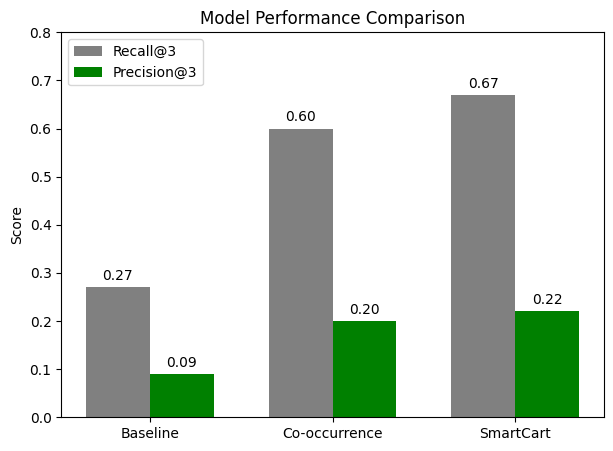

In [339]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data from our slide (example values)
models = ["Baseline", "Co-occurrence", "SmartCart"]
recall_values = [0.27, 0.60, 0.67]     # Recall@3
precision_values = [0.09, 0.20, 0.22]  # Precision@3

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(7,5))

# Bars for Recall and Precision
bars1 = ax.bar(x - width/2, recall_values, width, label='Recall@3', color='grey')
bars2 = ax.bar(x + width/2, precision_values, width, label='Precision@3', color='green')

# Labeling
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding data labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.ylim(0, 0.8)
plt.show()


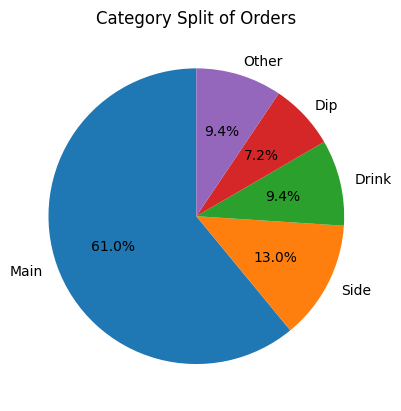

In [340]:
import matplotlib.pyplot as plt

categories = ['Main', 'Side', 'Drink', 'Dip', 'Other']
values = [60.9, 13.0, 9.4, 7.2, 9.4]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Category Split of Orders')
plt.show()

In [341]:
# Imports of library
import pandas as pd
import numpy as np
from difflib import get_close_matches
import os, shutil, pickle

In [342]:
#Loading test file
test_path = "data/test_data_question.csv"
test_df = pd.read_csv(test_path)


In [343]:
# Preparing canonical mapping of known items (from our training data) = # Using the all_items set we built earlier.
try:
    all_items = set(item for sublist in order_df['ITEM_LIST'] for item in sublist)
except Exception:
    all_items = set()  # fallback -> will still work but less mapping ability

In [344]:
# Lowercase lookup for fuzzy matching
known_lower_to_orig = {itm.lower(): itm for itm in all_items}
known_items_lower = list(known_lower_to_orig.keys())

In [345]:
def map_to_canonical(item_name, cutoff=0.75):
    """Map test item name to canonical training item if similar. Returns original if no match."""
    if not isinstance(item_name, str) or item_name.strip() == "":
        return None
    name = item_name.strip()
    low = name.lower()
    # direct exact -> fast path
    if low in known_lower_to_orig:
        return known_lower_to_orig[low]
    # fuzzy match
    matches = get_close_matches(low, known_items_lower, n=1, cutoff=cutoff)
    if matches:
        return known_lower_to_orig[matches[0]]
    # no match — return original (recommender fallback will handle unseen)
    return name

In [346]:
# Choosing which co-occurrence matrix to use (normalized preferred) & Use normalized_co_matrix if available, else fallback to co_occurrence_dict.
co_matrix = None
if 'normalized_co_matrix' in globals():
    co_matrix = normalized_co_matrix
elif 'normalized_co_dict' in globals():
    co_matrix = normalized_co_dict
elif 'co_occurrence_dict' in globals():
    co_matrix = co_occurrence_dict
else:
    raise RuntimeError("No co-occurrence matrix found in environment (create co_occurrence_dict or normalized_co_matrix).")

# Ensuring the other artifacts exist (fallback defaults)
if 'item_type_dict' not in globals():
    item_type_dict = {}   # we want to regenerate this properly
if 'item_feature_dict' not in globals():
    item_feature_dict = {}
if 'top_items_by_type' not in globals():
    top_items_by_type = {}  # building it from training freq counts
if 'blacklist_items' not in globals():
    blacklist_items = set([
        "Plastic Fork","Plastic Knife","Plastic Straw","Plastic Utensils",
        "Delivery Fee","Unavailable Item","Ketchup Pack","Seasoning Pack","Extra Sauce"
    ])

In [347]:
# Wrapper to get top-3 recommendations safely ===
def get_top3_for_cart(cart_items_raw, top_n=3, recommender_fn=None):
    """
    cart_items_raw: list of raw item strings (from test row)
    recommender_fn: our recommender function, e.g. smart_recommend_with_fallback
    returns: list of top_n item names (strings)
    """
    # Normalize & map items
    cart_mapped = [map_to_canonical(i) for i in cart_items_raw if isinstance(i, str) and str(i).strip() not in ["", "Missing", "NA", "nan", "None"]]
    cart_mapped = [i for i in cart_mapped if i is not None]
    
    # calling the recommender (prefer the smart one if available)
    recs = []
    try:
        if recommender_fn is None:
            # fallback: simple co-occurrence recommend_from_cart
            if 'recommend_from_cart' in globals():
                recs = recommend_from_cart(cart_mapped, co_matrix, top_n=top_n)
            else:
                recs = []
        else:
            # If our recommender returns tuples (item, score), normalize to item names
            result = recommender_fn(
                cart_mapped,
                co_matrix,
                item_type_dict,
                top_items_by_type,
                item_feature_dict,
                blacklist_items,
                top_n=top_n
            )
            # result may be list of (item,score) or list of items
            if result and isinstance(result[0], tuple):
                recs = [r[0] for r in result][:top_n]
            else:
                recs = list(result)[:top_n]
    except Exception as e:
        # in case recommender fails, fallback to global most-popular items (by type)
        print("Warning: recommender failed for cart", cart_mapped, "->", e)
        recs = []

    # If fewer than top_n, pad using safe popular fallbacks while avoiding duplicates
    if len(recs) < top_n:
        # first try top items across types
        added = set(recs) | set(cart_mapped) | set(blacklist_items)
        for t in ['main', 'side', 'dip', 'drink']:
            for itm_count in top_items_by_type.get(t, []):
                candidate = itm_count[0] if isinstance(itm_count, tuple) else itm_count
                if candidate not in added:
                    recs.append(candidate)
                    added.add(candidate)
                if len(recs) >= top_n:
                    break
            if len(recs) >= top_n:
                break
    # Finally ensure length == top_n
    recs = recs[:top_n] + [""]*(top_n - len(recs))
    return recs


In [348]:
# Running through test_df and fill RECOMMENDATION 1/2/3 ===
output_cols = ['RECOMMENDATION 1','RECOMMENDATION 2','RECOMMENDATION 3']
for c in output_cols:
    test_df[c] = ""

# choosing which recommender to use (prefer smart_recommend_with_fallback if available)
recommender_fn = None
if 'smart_recommend_with_fallback' in globals():
    recommender_fn = smart_recommend_with_fallback
elif 'enhanced_recommend_from_cart' in globals():
    recommender_fn = enhanced_recommend_from_cart
elif 'recommend_from_cart' in globals():
    recommender_fn = None  # using default inside get_top3_for_cart

# iterate rows
for idx, row in test_df.iterrows():
    # Building raw cart: adapt if oour test file uses different column names
    raw_items = []
    for col in ['item1','item2','item3']:
        if col in row.index:
            raw_items.append(row[col])
    recs = get_top3_for_cart(raw_items, top_n=3, recommender_fn=recommender_fn)
    for i in range(3):
        test_df.at[idx, output_cols[i]] = recs[i]

In [349]:
#Saving to Excel/CSV with required naming ===
team_name = "JaiMataDi"   # CHANGE to our team name
output_dir = f"{team_name}_WWT_Comp2025"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, f"{team_name}_Recommendation_Output_Sheet.xlsx")
# Choosing columns that judge expects (example): CUSTOMER_ID, ORDER_ID, item1..item3, RECOMMENDATION 1..3
save_cols = []
for c in ['CUSTOMER_ID','ORDER_ID','item1','item2','item3']:
    if c in test_df.columns:
        save_cols.append(c)
save_cols += output_cols

test_df.to_csv(output_file.replace(".xlsx", ".csv"), index=False)
print("Saved recommendation sheet to:", output_file)

Saved recommendation sheet to: JaiMataDi_WWT_Comp2025/JaiMataDi_Recommendation_Output_Sheet.xlsx


In [350]:
#We want to zip everything for submission
# Making sure we include: output excel, final.ipynb, requirements.txt, presentation.pptx
zip_name = f"{team_name}_WWT_Comp2025"
shutil.make_archive(zip_name, 'zip', root_dir='.', base_dir=output_dir)
print("Zipped submission ready:", zip_name + ".zip")

Zipped submission ready: JaiMataDi_WWT_Comp2025.zip


In [351]:
#If test_df contains a ground-truth column, we have compute Recall@3 ===
# detecting likely truth columns
possible_truth_cols = [c for c in test_df.columns if c.lower() in ('actual','missing','true','true_item','missing_item','item4','next_item','actual_item','ground_truth')]
if possible_truth_cols:
    truth_col = possible_truth_cols[0]
    print("Found truth column:", truth_col, "- computing Recall@3 locally")
    y_true = [[val] if not isinstance(val, (list,tuple)) else list(val) for val in test_df[truth_col].fillna("").tolist()]
    y_pred = [ [test_df.at[i, c] for c in output_cols] for i in range(len(test_df))]
    # simple recall@3
    hits = 0
    for t, p in zip(y_true, y_pred):
        if any(x in p for x in t if x):
            hits += 1
    recall3 = hits / len(y_true)
    print(f"Local Recall@3 = {recall3:.3f} (based on detected truth column)")
else:
    print("No obvious ground-truth column found; skipping local evaluation.")

No obvious ground-truth column found; skipping local evaluation.
